# Hola Mundo CNNs

![CoruñaAI](https://github.com/pabloformoso/MeetupCorunaAI/blob/master/1.%20TF.Keras.Perceptron.CNN1/notebooks_img/coruai.gif)

Hasta ahora trabajamos con Tensorflow usando unos pocos métodos de la API enfocados a operaciones. Si recordamos la filosofía de TF, este se puede entender como un motor que ejecuta un gráfico computacional que se ejecutaba dentro de una sesión.

Para nuestro Perceptro el grafo resultante era similar al siguiente:

![alt text](https://naml.us/paper/tensorflow/graph.svg)

Al hacer correr nuestra la opreción C en la sesión de tensorflow, este ejecutará todas las operaciones necesarias para realizar la clasificación C. Gracias al playground

Vamos a pararnos unos minutos en jugar con el Playground y ver como afecta la composición de una red y las entradas con los dos grandes problemas de ML:

* Overfitting: De forma simple, podemos decir que una red hace overfitting cuando la red se ha ajustado tanto que no sería capaz de clasificar bien problemas fuera de la colección de entramiento. O lo que es lo mismo. En la colección de validación veremos que hay una diferencia muy grande en la precisión de los resultados. Normalmente indica in exceso capas en el modelo o la necesidad de más (o menos) caracteristicas

* Underfitting: Lo contrario a Overfitting, el fit es tan pobre que la clasificación es muy pobre tanto en entretamiento como en validación.

![alt text](https://cdn-images-1.medium.com/max/1200/1*cdvfzvpkJkUudDEryFtCnA.png)

[Playground CNN](http://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0.001&noise=0&networkShape=8&seed=0.76281&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

[ConvolutionalDeepBeliefNetworks](http://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf)


## La naturaleza de las CNNs

Vamos indagar un poco en las CNN y por que la convulución nos ayuda en el procesamiento de imagenes. El modelo respresetnado en el diagrama está demostrado en diferentes papers que fuciona con una precisión relativamente aceptable en la mayoría de los casos.

A nivel de capas encontramos:

* Capa de entrada de datos. La imagen con los pixels normalizados en un vector único del tamaño px_alto * px_ancho.
* Capas de convulución. Procesan y extraen la mayor información posible.
* Capas de Pooling: Nos ayudan a simplificar los datos y focalizar en los relevanes.
* Capas de DropOut: Eliminar caracteristicas poco relevantes.
* Capas de normalización: Con imágenes, trabajando con este tipo de operaciones es facil acabar con números altos y se recomienda normalizar los datos tras la convolución.

![alt text](https://www.jeremyjordan.me/content/images/2018/04/vgg16.png)

### Convolución (la nueva revolución)

Para enteder las convoluciones podemos partir la API que usaremos de TensorFlow.

#### tf.keras.layers.Conv2D

* filters: Número de filtros que se van a aplicar. 
* kernel_size: Tupla de la forma (N,M) para aplicar los filtros. Simplicado es al venta sobre la que se aplica el filtro
* strides: Saltos a dar en el moviemiento de la ventana. 
* activation: función de activación que aplica tras la convolución. Los eficiente es utilizar una ReLU.

![alt text](https://cdn-images-1.medium.com/max/1200/0*Asw1tDuRs3wTjwi7.gif)

#### tf.keras.layers.MaxPooling2D

* pool_size: tupla de dimension (N,M) para extraer el mayor valor y reducirlo.
* strides: idem que en las Conv2D

![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

#### tf.keras.layers.Dropout

* rate: Ratio para eliminar valores de forma random bajo el ratio. Estos valores se ponen a 0

![alt text](https://cdn-images-1.medium.com/max/1600/0*mAtgnyEc6FbDlfEp.)


# Sin CNNs

Sin usar CNN con una red Densa y Plana. Vamos a utlizarla como línea base.

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4987 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3770 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3350 - acc: 0.8792
Epoch 4/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3129 - acc: 0.8862
Epoch 5/5
10000/10000 [==============================] - 1s 69us/sample - loss: 0.3393 - acc: 0.8781


# Primera CNN

Aplicamos un modelo sencillo de dos capasa de 64, nuestro grafó de computación sería similar a:

- Entrada normalizada
- Convolución 1 (64 filtros)
- Maxpooling 1 
- Convolución 2 (64 filtros)
- Maxpooling 2
- Unrolling a una capa plana
- Clasificador, capa densa (128)
- Salida (10)

Como optimizadores usaremos Adam y como función de coste entropia cruzada para clasificación (categorical).


In [2]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


1.13.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Tot

# Echando un ojo por dentro



In [3]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


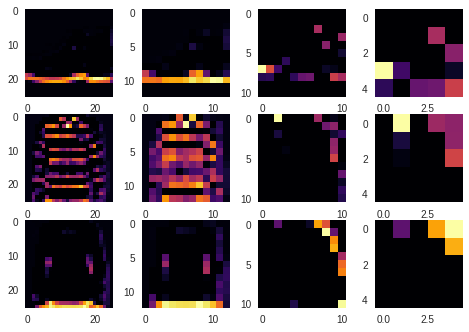

In [4]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## Trastear!!!! 

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([

])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)